In [4]:
import matplotlib.pyplot as plt
import numpy as np

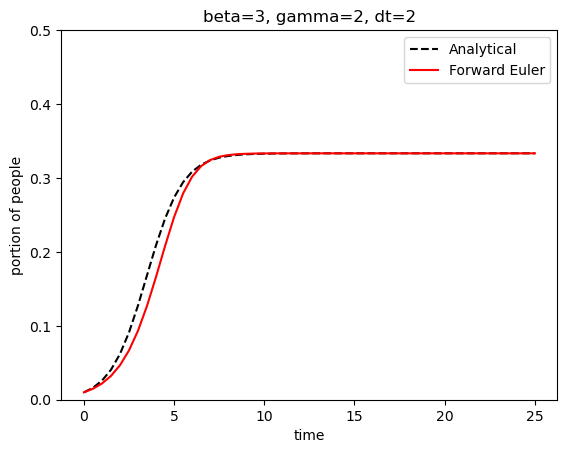

In [87]:
#Problem 1a

#initial values
dt=0.5
num_points = int(25 / dt) + 1 
t = np.linspace(0, 25, num_points)
beta=3
gamma=2
i0=0.01
s0=0.99
R0inv=(gamma/beta)
#ianalytical= (1-(1/(beta/gamma)))
i=np.zeros(num_points)
s=np.zeros(num_points)

#sis equations
def sdot(s,i):
    return (-beta*s*i)+(gamma*i)
def idot(s,i):
    return (beta*s*i) - (gamma*i)

i[0]=i0
s[0]=s0

#forward euler
for k in range(int(25 / dt)):  
    s[k + 1] = s[k] + sdot(s[k], i[k]) * dt
    i[k + 1] = i[k] + idot(s[k], i[k]) * dt

#function for analytical solution
def i_analytical(t, i0, R0inv,beta,gamma):
    return (1-R0inv)/(1+((1-R0inv-i0)/i0)*np.exp((-beta+gamma)*t))

#calculate analytical solution
i_ana = i_analytical(t, i0, R0inv,beta,gamma)

#plotting
plt.plot(t, i_ana, label='Analytical', color='black', linestyle='dashed')
plt.plot(t,i,label='Forward Euler',color='red')
plt.ylim(0, 0.5)
plt.legend()
plt.xlabel('time')
plt.ylabel('portion of people')
plt.title('beta=3, gamma=2, dt=2')
plt.show()


In [88]:
#Problem 1b

#initial values
dt=0.5
num_points = int(25 / dt) + 1 
t = np.linspace(0, 25, num_points)
beta=3
gamma=2
i0=0.01
s0=0.99
R0inv=(gamma/beta)
#ianalytical= (1-(1/(beta/gamma)))
i=np.zeros(num_points)
s=np.zeros(num_points)

#sis equations
def sdot(s,i):
    return (-beta*s*i)+(gamma*i)
def idot(s,i):
    return (beta*s*i) - (gamma*i)

i[0]=i0
s[0]=s0

#forward euler
for k in range(int(25 / dt)):  
    s[k + 1] = s[k] + sdot(s[k], i[k]) * dt
    i[k + 1] = i[k] + idot(s[k], i[k]) * dt

#function for analytical solution
def i_analytical(t, i0, R0inv,beta,gamma):
    return (1-R0inv)/(1+((1-R0inv-i0)/i0)*np.exp((-beta+gamma)*t))

#calculate analytical solution
i_ana = i_analytical(t, i0, R0inv,beta,gamma)

Err=np.max(np.abs((i-i_ana)))
print(Err)

0.04283504637204699


Text(0, 0.5, 'Error')

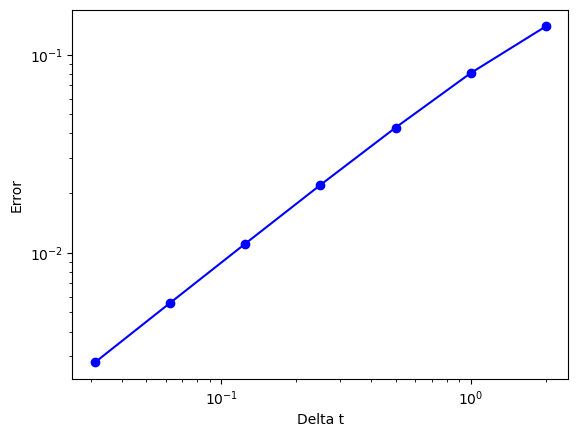

In [89]:
#problem 1d
errors = []

#initial values
for dt in [2,1,0.5,.25,.125,.0625,.03125]:
    num_points = int(25 / dt) + 1 
    t = np.linspace(0, 25, num_points)
    beta=3
    gamma=2
    i0=0.01
    s0=0.99
    R0inv=(gamma/beta)
    #ianalytical= (1-(1/(beta/gamma)))
    i=np.zeros(num_points)
    s=np.zeros(num_points)

    #sis equations
    def sdot(s,i):
        return (-beta*s*i)+(gamma*i)
    def idot(s,i):
        return (beta*s*i) - (gamma*i)

    i[0]=i0
    s[0]=s0

    #forward euler
    for k in range(int(25 / dt)):  
        s[k + 1] = s[k] + sdot(s[k], i[k]) * dt
        i[k + 1] = i[k] + idot(s[k], i[k]) * dt

    #function for analytical solution
    def i_analytical(t, i0, R0inv,beta,gamma):
        return (1-R0inv)/(1+((1-R0inv-i0)/i0)*np.exp((-beta+gamma)*t))

    #calculate analytical solution
    i_ana = i_analytical(t, i0, R0inv,beta,gamma)

    Err=np.max(np.abs((i-i_ana)))
    errors.append(Err)
plt.loglog([2,1,0.5,.25,.125,.0625,.03125], errors, marker='o', color='blue')
plt.xlabel('Delta t')
plt.ylabel('Error')

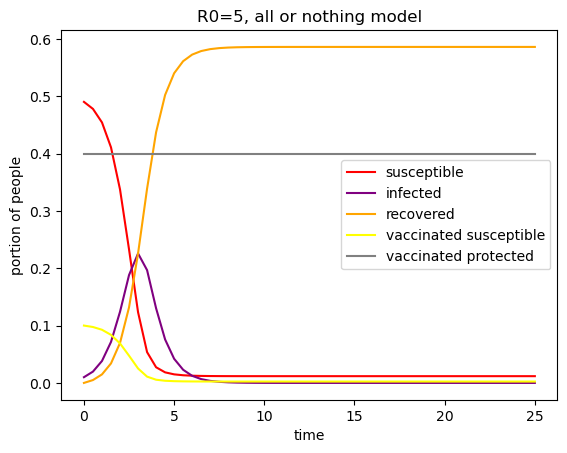

In [104]:
#2c all or nothing

#initial values
dt=0.5
num_points = int(25 / dt) + 1 
t = np.linspace(0, 25, num_points)
beta=5
gamma=1
N=300000
i0=0.01
s0=0.49
R0inv=(gamma/beta)
#ianalytical= (1-(1/(beta/gamma)))
i=np.zeros(num_points)
s=np.zeros(num_points)
r=np.zeros(num_points)
v0=np.zeros(num_points)
vall=np.zeros(num_points)

# equations
def sdot(s,i):
    return (-beta*s*i)
def idot(s,i,v0):
    return (beta*s*i) - (gamma*i) + (beta*v0*i)
def rdot(i):
    return (gamma*i)
def v0dot(v0,i):
    return (-beta*v0*i)
def valldot():
    return 0


i[0]=i0
s[0]=s0
r[0]=0
v0[0]=0.1
vall[0]=0.4

#forward euler
for k in range(int(25 / dt)):  
    s[k + 1] = s[k] + sdot(s[k], i[k]) * dt
    i[k + 1] = i[k] + idot(s[k], i[k], v0[k]) * dt
    r[k + 1] = r[k] + rdot(i[k]) * dt
    v0[k + 1] = v0[k] + v0dot(v0[k], i[k]) * dt
    vall[k + 1] = vall[k] + valldot() * dt
    
#plotting
plt.plot(t,s,label='susceptible',color='red')
plt.plot(t,i,label='infected',color='purple')
plt.plot(t,r,label='recovered',color='orange')
plt.plot(t,v0,label='vaccinated susceptible',color='yellow')
plt.plot(t,vall,label='vaccinated protected',color='gray')
plt.legend()
plt.xlabel('time')
plt.ylabel('portion of people')
plt.title('R0=5, all or nothing model')
plt.show()


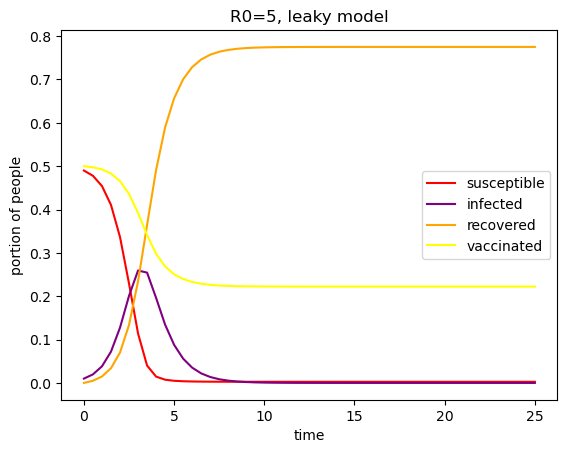

In [110]:
#2c leaky model

#initial values
dt=0.5
num_points = int(25 / dt) + 1 
t = np.linspace(0, 25, num_points)
beta=5
gamma=1
N=300000
VE=0.8
i0=0.01
s0=0.49
R0inv=(gamma/beta)
#ianalytical= (1-(1/(beta/gamma)))
i=np.zeros(num_points)
s=np.zeros(num_points)
r=np.zeros(num_points)
v=np.zeros(num_points)


# equations
def sdot(s,i):
    return (-beta*s*i)
def idot(s,i,v):
    return (beta*s*i) - (gamma*i) +(beta*v*i*(1-VE))
def rdot(i):
    return (gamma*i)
def vdot(v,i):
    return (-beta*v*i*(1-VE))



i[0]=i0
s[0]=s0
r[0]=0
v[0]=0.5

#forward euler
for k in range(int(25 / dt)):  
    s[k + 1] = s[k] + sdot(s[k], i[k]) * dt
    i[k + 1] = i[k] + idot(s[k], i[k], v[k]) * dt
    r[k + 1] = r[k] + rdot(i[k]) * dt
    v[k + 1] = v[k] + vdot(v[k], i[k]) * dt
    
#plotting
plt.plot(t,s,label='susceptible',color='red')
plt.plot(t,i,label='infected',color='purple')
plt.plot(t,r,label='recovered',color='orange')
plt.plot(t,v,label='vaccinated',color='yellow')
plt.legend()
plt.xlabel('time')
plt.ylabel('portion of people')
plt.title('R0=5, leaky model')
plt.show()
